In [1]:
!pip install gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0


HTML(value="<h3 style='text-align:center;'>💰 AI-Powered Personal Finance Management System</h3>")

Category,Amount (QAR),Percent
Rent,12500.00,25%
Utilities,2500.00,5%
Food,5000.00,10%
Transport,4000.00,8%
Healthcare,2500.00,5%
Savings,12000.00,10%
Investments,5000.00,10%
Entertainment,5000.00,10%
Others,1500.00,3%


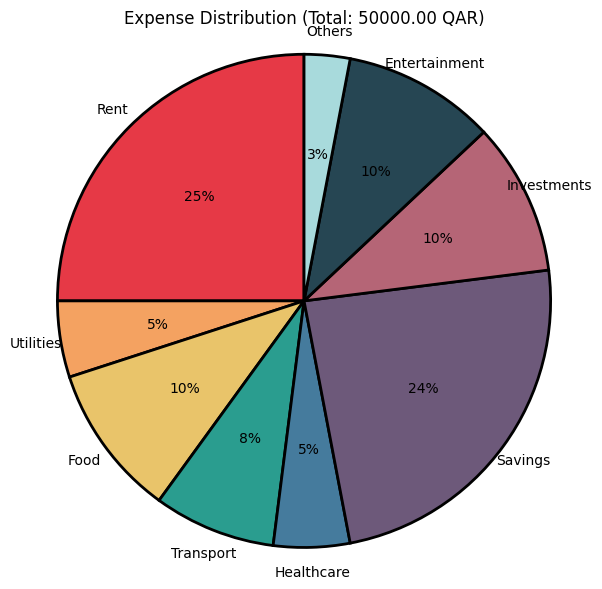

In [2]:
import gtts as gtts
import ipywidgets as widgets
from IPython.display import display, HTML, Audio
from gtts import gTTS
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML


class PersonalFinanceApp:
    def __init__(self):
        self.create_widgets()

    def create_widgets(self):
        # App title
        self.logo_label = widgets.HTML(
            value="<h3 style='text-align:center;'>💰 AI-Powered Personal Finance Management System</h3>"
            )
        display(self.logo_label)

        # Buttons
        self.track_expenses_button = widgets.Button(description="Track Your Expenses", style=widgets.ButtonStyle(button_color='lightblue'))
        self.money_tips_button = widgets.Button(description="See Money Tips", style=widgets.ButtonStyle(button_color='lightgreen'))
        self.predict_spending_button = widgets.Button(description="Predict Future Spending", style=widgets.ButtonStyle(button_color='salmon'))

        # Apply text wrapping style, uniform width, and center alignment
        button_layout = widgets.Layout(width='200px', overflow_wrap='break-word') # Setting a fixed width for consistency
        button_style = widgets.ButtonStyle()
        button_style.text_align = 'center' # Center align text

        self.track_expenses_button.layout = button_layout
        self.money_tips_button.layout = button_layout
        self.predict_spending_button.layout = button_layout

        # Apply the same style to all buttons (overrides individual button_color)
        self.track_expenses_button.style = button_style
        self.money_tips_button.style = button_style
        self.predict_spending_button.style = button_style

         # Inputs
        self.expenses_input = widgets.FloatText(  # FloatText for numeric input
                                                description="Expenses:",
                                                  layout=widgets.Layout(width='200px',)
                                                  )

        # Stack buttons vertically and center everything
        self.button_column = widgets.VBox(
            [self.track_expenses_button, self.money_tips_button, self.predict_spending_button, self.expenses_input],
            layout=widgets.Layout(
                #justify_content='center',   # vertical centering within VBox
                align_items='center',       # horizontal centering
                height='200px',              # takes 80% of viewport height
                width='100%'
                )
            )

        # Combine buttons and input into one vertically centered box
        self.center_box = widgets.VBox(
            [self.button_column],
            layout=widgets.Layout(
                align_items='center',      # horizontal centering
                #justify_content='center',  # vertical centering
                width='100%',
                height='200px'              # adjust for proper vertical centering
                )
            )

        # Display everything
        display(self.center_box)
        #display(self.expenses_input)



        # Link buttons to functions
        self.track_expenses_button.on_click(self.track_expenses)
        self.money_tips_button.on_click(self.see_money_tips)
        self.predict_spending_button.on_click(self.predict_future_spending)


    # Placeholder functions
    def track_expenses(self, b):
      try:
          expenses = float(self.expenses_input.value)

          if expenses == 0:
              display(HTML("<p style='text-align:center;'>You don't spend money on anything 😂</p>"))
              return

          # Calculate categories
          rent = expenses * 0.25
          utilities = expenses * 0.05
          food = expenses * 0.1
          transport = expenses * 0.08
          healthcare = expenses * 0.05
          investments = expenses * 0.1
          entertainment = expenses * 0.1
          others = expenses * 0.03
          savings = expenses - (rent + utilities + food + transport + healthcare + investments + entertainment + others)

          # Prepare data
          labels = ['Rent', 'Utilities', 'Food', 'Transport', 'Healthcare',
                    'Savings', 'Investments', 'Entertainment', 'Others']
          values = [rent, utilities, food, transport, healthcare,
                    savings, investments, entertainment, others]
          percents = ['25%', '5%', '10%', '8%', '5%', '10%', '10%', '10%', '3%']

          # DataFrame (centered using Styler)
          df = pd.DataFrame({
              'Category': labels,
              'Amount (QAR)': [f'{v:.2f}' for v in values],
              'Percent': percents
          })
          styled_df = df.style.set_table_styles(
              [{'selector': 'th, td', 'props': [('text-align', 'center')]}]
          ).hide(axis="index")  # hide index column for neat look

          display(HTML("<div style='display:flex; justify-content:center;'>"))
          display(styled_df)
          display(HTML("</div>"))

          # Pie chart (no double display)
          colors = ["#E63946", "#F4A261", "#E9C46A", "#2A9D8F",
                    "#457B9D", "#6D597A", "#B56576", "#264653", "#A8DADC"]

          fig, ax = plt.subplots(figsize=(7, 7))
          ax.pie(
              values,
              labels=labels,
              colors=colors,
              autopct='%1.0f%%',
              startangle=90,
              wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'antialiased': True},
              textprops={'ha': 'center'}
          )
          ax.set_title(f"Expense Distribution (Total: {expenses:.2f} QAR)")
          ax.axis('equal')

          # Center chart
          display(HTML("<div style='display:flex; justify-content:center;'>"))
          plt.show()
          display(HTML("</div>"))

      except ValueError:
          display(HTML("<p style='color: red; text-align:center;'>Please enter a valid number for expenses.</p>"))



    def see_money_tips(self, b):
        display(HTML("<p>1. <b>50-30-20 Rule</b> → Spend 50% on needs, 30% on wants, 20% on savings/investing.</p><p>2. <b>Track Every Rial</b> → Use daily expense logs to see where your money leaks.</p><p>3. <b>Emergency Fund</b> → Save 3–6 months of expenses in a liquid account.</p><p>4. <b>Avoid Lifestyle Inflation</b> → Don’t increase expenses just because your income rises.</p><p>5. <b>Sleep on Big Purchases</b> → Wait 24 hours before buying non-essentials.</p>"))

    def predict_future_spending(self, b):
        display(HTML("<p>Click here to predict future spending: <a href='https://www.google.com/finance'>Google Finance</a></p>"))

# Run the app
finance_app = PersonalFinanceApp()